# Monash University Weather Dataset

## Overview
The Monash University weather dataset is a comprehensive collection of daily weather data from various stations across Australia. The dataset encompasses four key weather variables:

- **Rain**
- **Minimum Temperature**
- **Maximum Temperature**
- **Solar Radiation**

## Data Collection
The data was collected from weather stations distributed across Australia, offering a wide geographical coverage and a rich historical record. The dataset was compiled using the `bomrang` R package, which interfaces with the Australian Bureau of Meteorology (BOM) data services.

## Dataset Features
- **Number of Time Series:** 3010
- **Frequency:** Daily
- **Variables:**
  - Rainfall (in millimeters)
  - Minimum Temperature (in degrees Celsius)
  - Maximum Temperature (in degrees Celsius)
  - Solar Radiation (in MJ/m²)
- **Forecast length:** 336 days
> only *Maximum Temperature* is used in this notebook

> The first 5000 datapoints are used of each station, padded with zeros on the left if necessary


## Usage
The dataset is useful for various applications, including:
- Weather forecasting
- Climate research
- Machine learning model training for time series analysis
- Renewable energy studies, particularly solar power research

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

In [2]:
%pip install gluonts

In [3]:
from gluonts.dataset.repository import get_dataset, dataset_names

e:\ReadyTensor\rt_datasets_longterm_forecasting\.venv\Lib\site-packages\gluonts\json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [4]:
print(f"Available datasets: {dataset_names}")

Available datasets: ['constant', 'exchange_rate', 'solar-energy', 'electricity', 'traffic', 'exchange_rate_nips', 'electricity_nips', 'traffic_nips', 'solar_nips', 'wiki2000_nips', 'wiki-rolling_nips', 'taxi_30min', 'kaggle_web_traffic_with_missing', 'kaggle_web_traffic_without_missing', 'kaggle_web_traffic_weekly', 'm1_yearly', 'm1_quarterly', 'm1_monthly', 'nn5_daily_with_missing', 'nn5_daily_without_missing', 'nn5_weekly', 'tourism_monthly', 'tourism_quarterly', 'tourism_yearly', 'cif_2016', 'london_smart_meters_without_missing', 'wind_farms_without_missing', 'car_parts_without_missing', 'dominick', 'fred_md', 'pedestrian_counts', 'hospital', 'covid_deaths', 'kdd_cup_2018_without_missing', 'weather', 'm3_monthly', 'm3_quarterly', 'm3_yearly', 'm3_other', 'm4_hourly', 'm4_daily', 'm4_weekly', 'm4_monthly', 'm4_quarterly', 'm4_yearly', 'm5', 'uber_tlc_daily', 'uber_tlc_hourly', 'airpassengers', 'australian_electricity_demand', 'electricity_hourly', 'electricity_weekly', 'rideshare_wit

In [5]:
dataset_name = "weather_forecast_len_336"


In [6]:
dataset_path = Path(f'./../../raw/{dataset_name}/')
output_dir = f'./../../processed/{dataset_name}/'
os.makedirs(output_dir, exist_ok=True)
outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')
outp_fig_fname = os.path.join(output_dir, f'{dataset_name}.png')

In [7]:
gluonts_dataset_name = "weather"

# Read Data

In [8]:
data = get_dataset(gluonts_dataset_name, regenerate=True,path=dataset_path)

Download weather_dataset.zip:: 37.0MB [00:11, 3.44MB/s]                            
creating json files: 100%|██████████| 3010/3010 [00:00<00:00, 360257.25it/s]


In [9]:
data.metadata.json()

'{"freq": "D", "target": null, "feat_static_cat": [{"name": "feat_static_cat_0", "cardinality": "3010"}], "feat_static_real": [], "feat_dynamic_real": [], "feat_dynamic_cat": [], "prediction_length": 30}'

In [10]:
df_gluonts = pd.DataFrame(data.test)
print("data shape : ",df_gluonts.shape)
print(df_gluonts.iloc[0]['target'].shape)
print(df_gluonts['item_id'].unique())
df_gluonts.head()

data shape :  (3010, 4)
(4255,)
['T1' 'T2' 'T3' ... 'T3008' 'T3009' 'T3010']


,target,start,item_id,feat_static_cat
0,"[1.6492335, 1.6492335, 1.6492335, 1.6492335, 1...",1970-01-01,T1,[0]
1,"[1.7578782, 1.7578782, 1.7578782, 1.7578782, 1...",1970-01-01,T2,[1]
2,"[3.0508387, 3.0508387, 3.0508387, 3.0508387, 3...",1970-01-01,T3,[2]
3,"[1.869858, 1.869858, 1.869858, 1.869858, 1.869...",1970-01-01,T4,[3]
4,"[2.5392778, 2.5392778, 2.5392778, 2.5392778, 2...",1970-01-01,T5,[4]


In [ ]:
## download the dataset from here https://zenodo.org/records/4654822
# def load_tsf(file_path):
#     with open(file_path, 'r') as file:
#         lines = file.readlines()

#     metadata = {
#         'relation': None,
#         'attributes': [],
#         'frequency': None,
#         'missing': None,
#         'equallength': None
#     }
#     data = []
#     in_data_section = False

#     for line in lines:
#         line = line.strip()
#         if not line or line.startswith('#'):
#             continue
#         if line.startswith('@relation'):
#             metadata['relation'] = line.split(' ', 1)[1]
#         elif line.startswith('@attribute'):
#             parts = line.split(' ')
#             metadata['attributes'].append((parts[1], parts[2]))
#         elif line.startswith('@frequency'):
#             metadata['frequency'] = line.split(' ', 1)[1]
#         elif line.startswith('@missing'):
#             metadata['missing'] = line.split(' ', 1)[1] == 'true'
#         elif line.startswith('@equallength'):
#             metadata['equallength'] = line.split(' ', 1)[1] == 'true'
#         elif line.startswith('@data'):
#             in_data_section = True
#         elif in_data_section:
#             parts = line.split(':')
#             identifier = parts[0]
#             series_type = parts[1]
#             time_series = list(map(float, parts[2].split(',')))
#             data.append([identifier, series_type] + time_series)

#     max_series_length = max(len(row) for row in data) - 2
#     columns = ['Identifier', 'Series_Type'] + [f'Time_{i}' for i in range(max_series_length)]

#     df = pd.DataFrame(data, columns=columns)

#     df = df.apply(lambda x: pd.Series(x.dropna().values))

#     return df, metadata

# file_path = 'weather_dataset.tsf'
# df_original, metadata = load_tsf(file_path)
# print(df_original)
# print(metadata)



     Identifier Series_Type     Time_0     Time_1     Time_2     Time_3  \
0            T1        rain   1.649233   1.649233   1.649233   1.649233   
1            T2        rain   1.757878   1.757878   1.757878   1.757878   
2            T3        rain   3.050839   3.050839   3.050839   3.050839   
3            T4        rain   1.869858   1.869858   1.869858   1.869858   
4            T5        rain   2.539278   2.539278   2.539278   2.539278   
...         ...         ...        ...        ...        ...        ...   
3005      T3006       solar  25.300000  26.800000  26.800000  29.700000   
3006      T3007       solar  31.100000  29.700000  21.700000  28.600000   
3007      T3008       solar  25.500000  25.700000  25.400000  28.300000   
3008      T3009       solar  30.800000  30.600000  22.919550  28.600000   
3009      T3010       solar  29.200000  31.200000  22.616037  30.700000   

         Time_4     Time_5     Time_6     Time_7  ...  Time_65971  Time_65972  \
0      1.649233   

In [ ]:
# df_original.head()

,Identifier,Series_Type,Time_0,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,...,Time_65971,Time_65972,Time_65973,Time_65974,Time_65975,Time_65976,Time_65977,Time_65978,Time_65979,Time_65980
0,T1,rain,1.649233,1.649233,1.649233,1.649233,1.649233,1.649233,1.649233,1.649233,...,0.0,0.0,2.0,10.4,0.4,0.4,0.0,0.0,0.0,0.0
1,T2,rain,1.757878,1.757878,1.757878,1.757878,1.757878,1.757878,1.757878,1.757878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,T3,rain,3.050839,3.050839,3.050839,3.050839,3.050839,3.050839,3.050839,3.050839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,T4,rain,1.869858,1.869858,1.869858,1.869858,1.869858,1.869858,1.869858,1.869858,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T5,rain,2.539278,2.539278,2.539278,2.539278,2.539278,2.539278,2.539278,2.539278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# series_types = df_original['Series_Type'].unique()
# for s_type in series_types:
#     print(f"Start of series for type  {s_type}:  ", df_original[df_original['Series_Type']==s_type].iloc[0]['Identifier'])

Start of series for type  rain:   T1
Start of series for type  mintemp:   T730
Start of series for type  maxtemp:   T1478
Start of series for type  solar:   T2224


In [11]:
df_train = pd.DataFrame(data.train)
print("data shape : ",df_train.shape)
print(df_train.iloc[0]['target'].shape)
print(df_train['item_id'].unique())
print("Are both datasets the same ?? ",df_train.equals(df_gluonts))
df_train.head()

data shape :  (3010, 4)
(4225,)
['T1' 'T2' 'T3' ... 'T3008' 'T3009' 'T3010']
Are both datasets the same ??  True


,target,start,item_id,feat_static_cat
0,"[1.6492335, 1.6492335, 1.6492335, 1.6492335, 1...",1970-01-01,T1,[0]
1,"[1.7578782, 1.7578782, 1.7578782, 1.7578782, 1...",1970-01-01,T2,[1]
2,"[3.0508387, 3.0508387, 3.0508387, 3.0508387, 3...",1970-01-01,T3,[2]
3,"[1.869858, 1.869858, 1.869858, 1.869858, 1.869...",1970-01-01,T4,[3]
4,"[2.5392778, 2.5392778, 2.5392778, 2.5392778, 2...",1970-01-01,T5,[4]


## Extracting maxTemp series from gluonts dataset 
[T1478:T2223]

In [12]:
df_gluonts['item_id_num'] = df_gluonts['item_id'].str.extract('T(\d+)').astype(int)

start_num = 1478
end_num = 2223

maxTemp_df = df_gluonts[(df_gluonts['item_id_num'] >= start_num) & (df_gluonts['item_id_num'] <= end_num)]

# Drop the temporary numerical column and feat_static_cat column
maxTemp_df = maxTemp_df.drop(columns=['item_id_num', 'feat_static_cat']).reset_index(drop=True).rename(columns={'item_id' : 'series_id','target': 'max_temp'})
print(maxTemp_df.head(1)['series_id'])
print(maxTemp_df.tail(1)['series_id'])


0    T1478
Name: series_id, dtype: object
745    T2223
Name: series_id, dtype: object


## Spreading each series across the dataframe

In [13]:
maxTemp_df['start'] = maxTemp_df['start'].dt.to_timestamp('d')

max_points = 5000

timeseries_df = pd.DataFrame(columns=['series_id', 'timestamp', 'max_temp'])

for index, row in maxTemp_df.iterrows():

    item_id = row['series_id']
    max_temp_series = row['max_temp']
    
    if len(max_temp_series) < max_points:
        max_temp_series = np.pad(max_temp_series, (max_points - len(max_temp_series), 0), 'constant')
    else:
        max_temp_series = max_temp_series[:max_points]
    
    timestamp_range = range(1, max_points + 1)
    
    temp_df = pd.DataFrame({
        'series_id': item_id,
        'timestamp': timestamp_range,
        'max_temp': max_temp_series
    })
    
    timeseries_df = pd.concat([timeseries_df, temp_df], ignore_index=True)

print(timeseries_df)

        series_id timestamp  max_temp
0           T1478         1       0.0
1           T1478         2       0.0
2           T1478         3       0.0
3           T1478         4       0.0
4           T1478         5       0.0
...           ...       ...       ...
3729995     T2223      4996      -9.2
3729996     T2223      4997      -6.1
3729997     T2223      4998      -4.2
3729998     T2223      4999      -9.7
3729999     T2223      5000     -15.4

[3730000 rows x 3 columns]


# Identify columns to use for the dataset

In [14]:
series_col = "series_id"
epoch_col = ''
time_col = 'timestamp'
value_col = 'max_temp'
exog_cols=[]

# Visualize

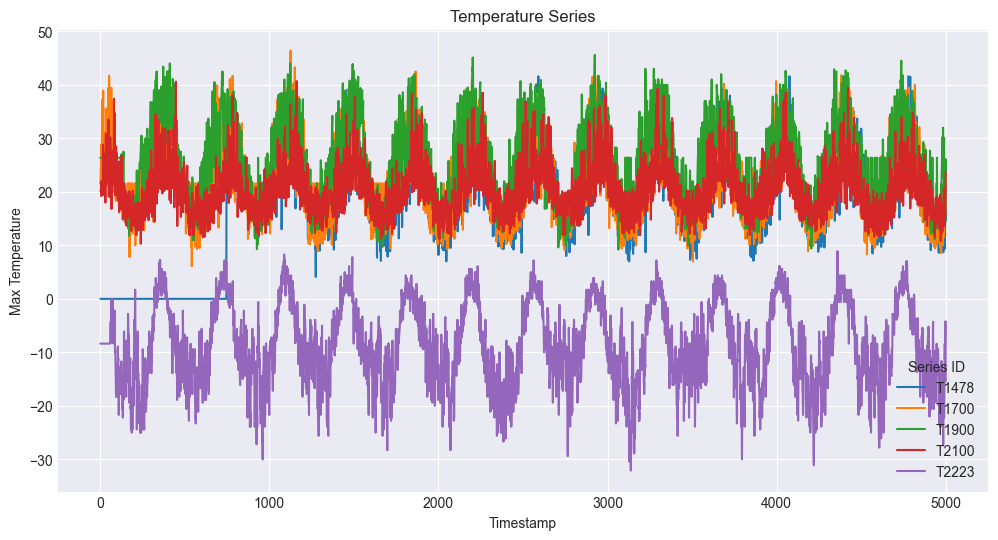

In [15]:
plt.style.use('seaborn-v0_8-darkgrid')

series_ids_to_plot = ['T1478', 'T1700', 'T1900', 'T2100', 'T2223']

df_to_plot = timeseries_df[timeseries_df['series_id'].isin(series_ids_to_plot)]

plt.figure(figsize=(12, 6))

for series_id in series_ids_to_plot:
    series_data = df_to_plot[df_to_plot['series_id'] == series_id]
    plt.plot(series_data['timestamp'], series_data['max_temp'], label=series_id)

plt.title('Temperature Series')
plt.xlabel('Timestamp')
plt.ylabel('Max Temperature')
plt.legend(title='Series ID')

plt.show()


# Save Data

In [16]:
timeseries_df.sort_values(by=[series_col, time_col], inplace=True)
timeseries_df.to_csv(outp_fname, index=False)

In [17]:
timeseries_df.shape

(3730000, 3)